# Relatório de Avaliação Comparativa de Classificadores

O objetivo desta atividade é realizar uma análise comparativa entre diferentes classificadores de aprendizagem de máquina utilizando a base de dados Adult Income da UCI. A partir da aplicação dos protocolos de avaliação estatística discutidos por J. Demšar, pretende-se desenvolver habilidades críticas na interpretação e análise dos resultados obtidos em métricas de desempenho como acurácia, precisão, recall, F1-score e curva ROC. Além disso, a atividade visa explorar a aplicação de testes estatísticos para identificar diferenças significativas entre os classificadores, promovendo uma compreensão mais aprofundada dos impactos dos parâmetros de configuração no desempenho dos modelos.

## 1. Revisão Teórica

### Funcionamento dos Classificadores

Destacamos as principais características, vantagens e desvantagens de cada modelo utilizados.

#### Multi-Layer Perceptron (MLP)

* **Funcionamento:** Rede neural composta por camadas (entrada, ocultas e saída), onde cada neurônio aplica uma função de ativação (ex.: ReLU, Sigmoid) e ajusta pesos via retropropagação.

* **Vantagens:** 

    * Capaz de capturar relações não lineares complexas, altamente flexível com ajuste de camadas e neurônios, eficaz em grandes datasets.

* **Desvantagens:** 

    * Requer alto poder computacional, propenso ao overfitting se não regularizado, tuning complexo dos hiperparâmetros (ex.: número de camadas, learning rate).

#### Learning Vector Quantization (LVQ)

* **Funcionamento:** Rede neural competitiva que utiliza protótipos representativos para classificar os dados, ajustando-os para melhorar a separação entre classes.

* **Vantagens**: 
    * Interpretação intuitiva dos protótipos, adequado para problemas de classificação, robusto a ruído.

* **Desvantagens:** 
    * Sensível à escolha inicial dos protótipos, pode convergir para mínimos locais, menos eficaz em problemas de alta dimensionalidade.

#### Decision Tree (Árvore de Decisão):

* **Funcionamento:** Cria uma estrutura hierárquica de decisões baseada em perguntas binárias ou múltiplas. Cada nó representa uma decisão baseada em um atributo específico, e os ramos representam os possíveis resultados.

* **Vantagens:**

  * Interpretação intuitiva e visualização fácil.
  * Não requer normalização dos dados.
  * Lida bem com dados categóricos e numéricos.

* **Desvantagens:**

  * Propensa ao overfitting se não podada adequadamente.
  * Sensível a pequenas variações nos dados.
  * Pode gerar árvores muito profundas e complexas.


#### Random Forest (Floresta Aleatória):

* **Funcionamento:** Cria múltiplas árvores de decisão treinadas com subconjuntos aleatórios do dataset (tanto amostras quanto atributos) e utiliza a média ou voto da maioria para definir a predição final.

* **Vantagens:**

  * Reduz overfitting em comparação à árvore de decisão única.
  * Robusta contra ruído e outliers.
  * Lida bem com datasets grandes e complexos.

* **Desvantagens:**

  * Pode ser mais lenta no treinamento e na predição.
  * Menos interpretável do que uma única árvore de decisão.
  * Requer mais memória devido ao armazenamento de múltiplas árvores.


#### Support Vector Machine (SVM):

* **Funcionamento:** Encontra o hiperplano ótimo que maximiza a margem entre as classes, utilizando métodos de kernel para lidar com problemas não linearmente separáveis.

* **Vantagens:**

  * Eficaz em espaços de alta dimensionalidade.
  * Flexível com o uso de diferentes funções kernel (linear, polinomial, radial, etc.).
  * Resistente ao overfitting em conjuntos de dados de pequenas dimensões.

* **Desvantagens:**

  * Custo computacional elevado para datasets grandes.
  * Requer ajuste cuidadoso dos hiperparâmetros (ex.: C e gamma).
  * Menos interpretável do que outros métodos (como árvores de decisão).


#### K-Nearest Neighbors (KNN)

* **Funcionamento:** Armazena todo o conjunto de treinamento e classifica um novo ponto com base na maioria dos vizinhos mais próximos (k). A proximidade é calculada por métricas como a Euclidiana, Manhattan, etc.

* **Vantagens:**

  * Simplicidade de implementação e compreensão.
  * Eficaz em datasets pequenos e bem distribuídos.
  * Não faz suposições sobre a distribuição dos dados.

* **Desvantagens:**

  * Custo computacional elevado em datasets grandes.
  * Sensível a outliers e ruído.
  * Necessita de escolha adequada do valor de **k**.


### Análise do Dataset Adult.csv

O dataset "adult.csv" é um conjunto de dados amplamente utilizado para tarefas de classificação em aprendizado de máquina. O objetivo principal é prever se a renda de um indivíduo excede US$ 50.000 por ano com base em diversos atributos demográficos e socioeconômicos. Este dataset foi extraído do banco de dados do Censo de 1994 por Barry Becker e está disponível no repositório de Machine Learning da UCI.

#### Visão Geral do Dataset:

**Objetivo**: Prever se a renda de um indivíduo é ">50K" ou "<=50K" por ano.

**Número de Atributos**: 14 atributos (além da variável alvo 'income').

**Tipos de Atributos**: Categóricos e Contínuos.

**Valores Ausentes**: O dataset original possui valores ausentes representados por "?".

#### Atributos (Features):

* `age`: Idade do indivíduo. _**(contínuo)**_

* `workclass`: Classe de trabalhador _**(categórico)**_: 
    * Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

* `fnlwgt`: Peso final, representando o número de indivíduos que as autoridades do censo acreditam que essa entrada representa. _**(contínuo)**_

* `education`: Nível de escolaridade do indivíduo _**(categórico)**_:  
    * Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* `education-num`: Número de anos de educação alcançados. _**(contínuo)**_

* `marital-status`: Estado civil do indivíduo _**(categórico)**_:  
    * Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* `occupation`: Ocupação do indivíduo _**(categórico)**_:  
    * Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* `relationship`: Relação familiar do indivíduo _**(categórico)**_:  
    * Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* `race`: Raça do indivíduo _**(categórico)**_:  
    * White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* `sex`: Sexo do indivíduo _**(categórico)**_:  
    * Female, Male.

* `capital-gain`: Ganho de capital. _**(contínuo)**_

* `capital-loss`: Perda de capital. _**(contínuo)**_

* `hours-per-week`: Número de horas trabalhadas por semana. _**(contínuo)**_

* `native-country`: País de origem do indivíduo _**(categórico)**_:  
    * United-States, Cuba, Jamaica, Germany, England, Canada, India, Japan, Greece, South, China, Scotland, Italy, Thailand, Hong-Kong, Philippines, Iran, Vietnam, Mexico, Puerto-Rico, Poland, Honduras, El-Salvador, Yugoslavia, Outlying-US(Guam-USVI-etc), Peru, Guatemala, Dominican-Republic, Ireland, Hungary, Columbia, Holand-Netherlands.

* `income`: Variável alvo _**(categórico)**_:  
    * .>50K, <=50K.

### Preparação da Base de Dados Adult Income:

Uma preparação do dataset "adult.csv” foi realizada, seguindo as seguintes etapas:


#### 1. Carregamento e Inspeção Inicial:
* Carregar o dataset usando bibliotecas como Pandas em Python.
* Visualizar as primeiras e últimas linhas para entender a estrutura dos dados.
* Verificar o número de linhas e colunas.
* Examinar os tipos de dados de cada coluna.

#### 2. Tratamento de Valores Ausentes:
* Identificar as colunas com valores ausentes (geralmente representados por "?").
* Analisar a proporção de valores ausentes em cada coluna.

#### 3. Decisão da estratégia de tratamento:
* Remover as linhas com valores ausentes (se a proporção for pequena).
* Imputar os valores ausentes usando a média, mediana (para atributos numéricos) ou a moda (para atributos categóricos).
* Utilizar algoritmos de imputação mais sofisticados.

#### 4. Análise Estatística Descritiva:
* Calcular estatísticas descritivas para atributos numéricos (média, mediana, desvio padrão, mínimo, máximo, quartis).
* Analisar a distribuição dos atributos numéricos através de histogramas e box plots.
* Examinar a contagem de valores e a frequência para atributos categóricos.
* Visualizar a distribuição dos atributos categóricos através de gráficos de barras.

#### 5. Visualização de Dados:
* Criar visualizações para entender a relação entre os atributos e a variável alvo ('income').
* Histogramas e Box Plots: Comparar a distribuição de atributos numéricos para diferentes grupos de renda (>50K e <=50K).
* Gráficos de Barras Empilhadas ou Agrupadas: Visualizar a proporção de diferentes categorias de atributos categóricos para cada grupo de renda.
* Gráficos de Dispersão: Investigar a relação entre pares de atributos numéricos e como a variável alvo se distribui nesses espaços.
* Mapas de Calor: Analisar a correlação entre os atributos numéricos.

#### 6. Engenharia de Atributos (Feature Engineering):
* Codificação de Variáveis Categóricas: Converter variáveis categóricas em formatos numéricos que os algoritmos de aprendizado de máquina possam entender (e.g., one-hot encoding, label encoding).
* Criação de Novas Features: Combinar ou transformar atributos existentes para criar novas features que possam ser mais preditivas (e.g., criar faixas etárias a partir da idade).
* Discretização de Atributos Contínuos: Converter atributos contínuos em categorias (e.g., agrupar horas de trabalho em "tempo parcial", "tempo integral", "horas extras").

#### 7. Análise de Relações e Padrões:
* Identificar quais atributos parecem ter maior influência na variável alvo.
* Observar possíveis interações entre diferentes atributos e seu impacto na renda.
* Analisar o desbalanceamento da variável alvo (se houver uma proporção significativamente diferente entre as categorias de renda).

#### 8. Possíveis Insights e Observações (Baseado em Análises Comuns):
* Educação: Indivíduos com níveis de escolaridade mais altos (e.g., Bachelors, Masters, Doctorate) tendem a ter uma proporção maior de renda superior a US$ 50.000.
* Idade: A renda pode aumentar com a idade até certo ponto, com os indivíduos mais experientes tendo maior probabilidade de ganhar mais.
* Ocupação: Certas ocupações (e.g., Exec-managerial, Prof-specialty) podem estar mais associadas a rendas mais altas.
* Estado Civil: Indivíduos casados (Married-civ-spouse) podem ter uma probabilidade maior de ter renda superior a US$ 50.000.
* Horas por Semana: Trabalhadores com mais horas por semana geralmente têm maior probabilidade de ter uma renda mais alta.
* País de Origem: A distribuição da renda pode variar significativamente entre os diferentes países de origem.
* Sexo e Raça: Pode haver disparidades na renda com base no sexo e na raça, o que pode ser um ponto importante para análise de equidade.

#### 9. Preparação para Modelagem:
Após a análise exploratória e a engenharia de atributos, o dataset estará pronto para ser utilizado em modelos de aprendizado de máquina para prever a renda. As etapas típicas incluem:

* Divisão dos Dados: Dividir o dataset em conjuntos de treinamento e teste para avaliar o desempenho do modelo em dados não vistos.
* Escalonamento de Atributos Numéricos: Aplicar técnicas de escalonamento (e.g., padronização ou normalização) para garantir que os atributos numéricos tenham escalas semelhantes.
* Seleção de Modelo: Escolher um ou mais algoritmos de classificação (e.g., regressão logística, árvores de decisão, florestas aleatórias, gradient boosting, máquinas de vetores de suporte).
* Treinamento do Modelo: Ajustar os parâmetros do modelo usando o conjunto de treinamento.
* Avaliação do Modelo: Avaliar o desempenho do modelo usando o conjunto de teste com métricas apropriadas (e.g., acurácia, precisão, recall, F1-score, AUC).

#### Conclusão:
Uma análise completa do dataset "adult.csv" envolve uma compreensão profunda dos atributos, o tratamento de dados faltosos, uma exploração visual e estatística das relações entre os atributos e a variável alvo, e a preparação dos dados para modelagem preditiva. Os insights obtidos durante a EDA são cruciais para entender os fatores que influenciam a renda e para informar as etapas subsequentes de modelagem e interpretação dos resultados. Este dataset continua sendo um recurso valioso para aprender e praticar técnicas de análise de dados e classificação em aprendizado de máquina.

## 2. Protocolo de Comparação

### Preparação e Divisão da Base de Dados

A correta preparação e divisão da base de dados são etapas fundamentais para garantir a validade dos resultados obtidos na comparação dos classificadores. Nesta atividade, o dataset foi dividido em conjuntos de treinamento e teste utilizando a técnica de validação cruzada estratificada com 5 folds. 

Esse método assegura que cada fold possua uma distribuição semelhante da variável alvo, reduzindo o viés e garantindo uma avaliação mais robusta dos modelos. Além disso, o uso da validação cruzada minimiza o risco de overfitting, permitindo que cada amostra seja utilizada tanto para treino quanto para teste, proporcionando uma visão mais completa do desempenho dos classificadores.

### Métricas de Avaliação

Para avaliar o desempenho dos classificadores, foram utilizadas as seguintes métricas:

* **Acurácia:** Proporção de previsões corretas em relação ao total de previsões. Indica a performance geral do modelo, mas pode ser enganosa em datasets desbalanceados.

* **Precisão:** Proporção de previsões positivas corretas em relação ao total de previsões positivas. É importante quando o custo de um falso positivo é alto.

* **Recall:** Proporção de previsões positivas corretas em relação ao total de positivos reais. Essencial em situações onde a identificação correta dos positivos é prioritária.

* **F1-score:** Média harmônica entre precisão e recall, equilibrando os dois aspectos. Ideal para datasets desbalanceados.

* **AUC-ROC:** Área sob a curva ROC, que avalia a capacidade do modelo em distinguir entre classes. Quanto mais próximo de 1, melhor a separação entre as classes positiva e negativa.

### Procedimentos Estatísticos para Comparação

Para avaliar se as diferenças de desempenho entre os classificadores são estatisticamente significativas, foram aplicados os testes recomendados por Demšar:

* **Teste de Friedman:** Utilizado para detectar diferenças significativas entre os classificadores em múltiplos folds. Este teste não pressupõe normalidade dos dados e é adequado para a comparação de mais de dois classificadores.

* **Teste de Nemenyi:** Aplicado como um post-hoc após o teste de Friedman. Ele permite identificar quais pares de classificadores apresentam diferenças significativas, comparando as médias dos ranks dos modelos. Quanto maior a diferença entre os ranks, maior a evidência de que os desempenhos são significativamente diferentes.

## 3. Execução da Comparação

### Implementação e Teste

A execução da comparação dos classificadores envolve a implementação e ajuste dos parâmetros dos modelos MLP, LVQ, KNN, SVM, Árvore de Decisão e Random Forest. 

#### 🔃 Carregamento e Pré-processamento dos Dados

In [54]:
# Importações necessárias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from random import seed, randrange
from math import sqrt
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Carregar a base (suponha que está em .csv)
df = pd.read_csv("adult.data", header=None, na_values=" ?", skipinitialspace=True)

# Adicionar nomes das colunas (base oficial)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
df.columns = columns

# Remover linhas com valores faltantes
df.dropna(inplace=True)

# Codificar variáveis categóricas
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

# Separar features e target
X = df.drop("income", axis=1).values
y = df["income"].values


#### 🏋️‍♂️ Treinamento e Avaliação dos Classificadores

In [56]:
# Implementação do LVQ
class LVQ:
    def __init__(self, n_codebooks=15, lrate=0.3, epochs=50, seed_val=1):
        self.n_codebooks = n_codebooks
        self.lrate = lrate
        self.epochs = epochs
        self.seed_val = seed_val
        self.codebooks = []

    def euclidean_distance(self, row1, row2):
        return sqrt(sum((row1[i] - row2[i])**2 for i in range(len(row1)-1)))

    def get_bmu(self, codebooks, test_row):
        distances = [(codebook, self.euclidean_distance(codebook, test_row)) for codebook in codebooks]
        distances.sort(key=lambda x: x[1])
        return distances[0][0]

    def train_codebooks(self, train):
        seed(self.seed_val)
        self.codebooks = [train[randrange(len(train))] for _ in range(self.n_codebooks)]

        for epoch in range(self.epochs):
            rate = self.lrate * (1.0 - (epoch / float(self.epochs)))
            for row in train:
                bmu = self.get_bmu(self.codebooks, row)
                for i in range(len(row)-1):
                    error = row[i] - bmu[i]
                    if bmu[-1] == row[-1]:
                        bmu[i] += rate * error
                    else:
                        bmu[i] -= rate * error

    def predict(self, row):
        bmu = self.get_bmu(self.codebooks, row)
        return bmu[-1]

    def fit(self, X, y):
        dataset = np.hstack((X, y.reshape(-1, 1))).tolist()
        self.train_codebooks(dataset)

    def predict_batch(self, X):
        return [self.predict(row) for row in X]


In [57]:
# Lista de classificadores
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(max_iter=500, random_state=42),
    "LVQ": LVQ()
}

# Função para avaliar classificadores
def avaliar_modelos(models, X, y):
    results = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        acc, prec, rec, f1, auc = [], [], [], [], []

        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            if name == "LVQ":
                model.fit(X_train, y_train)
                y_pred = model.predict_batch(X_test)
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

            acc.append(accuracy_score(y_test, y_pred))
            prec.append(precision_score(y_test, y_pred))
            rec.append(recall_score(y_test, y_pred))
            f1.append(f1_score(y_test, y_pred))

            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                auc.append(roc_auc_score(y_test, y_prob))
            elif name == "LVQ":
                auc.append(0)  # LVQ não possui probabilidade
            else:
                auc.append(roc_auc_score(y_test, model.decision_function(X_test)))

        results.append({
            "Classificador": name,
            "Acurácia": np.mean(acc),
            "Precisão": np.mean(prec),
            "Recall": np.mean(rec),
            "F1-score": np.mean(f1),
            "AUC-ROC": np.mean(auc)
        })

    return pd.DataFrame(results)


In [58]:
# Executar a avaliação
df_resultados = avaliar_modelos(models, X, y)
print(df_resultados)

   Classificador  Acurácia  Precisão    Recall  F1-score   AUC-ROC
0  Decision Tree  0.813151  0.609505  0.624284  0.616667  0.748671
1  Random Forest  0.857990  0.744004  0.625432  0.679559  0.906377
2            SVM  0.795215  0.976964  0.153168  0.264727  0.628914
3            KNN  0.778846  0.571235  0.325723  0.414777  0.673684
4            MLP  0.783913  0.830789  0.149602  0.239383  0.609925
5            LVQ  0.763521  1.000000  0.017982  0.035317  0.000000


#### 🔬 Testes Estatísticos de Friedman e Nemenyi

In [59]:
# Função para avaliar classificadores com métricas por fold
def avaliar_modelos_completo(models, X, y):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    resultados_fold = {
        "Modelo": [],
        "Fold": [],
        "Acuracia": [],
        "Precisao": [],
        "Recall": [],
        "F1": [],
        "AUC": []
    }

    for name, model in models.items():
        for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            if name == "LVQ":
                model.fit(X_train, y_train)
                y_pred = model.predict_batch(X_test)
                y_prob = [0] * len(y_test)  # LVQ não possui predict_proba
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

            resultados_fold["Modelo"].append(name)
            resultados_fold["Fold"].append(fold_idx + 1)
            resultados_fold["Acuracia"].append(accuracy_score(y_test, y_pred))
            resultados_fold["Precisao"].append(precision_score(y_test, y_pred))
            resultados_fold["Recall"].append(recall_score(y_test, y_pred))
            resultados_fold["F1"].append(f1_score(y_test, y_pred))
            resultados_fold["AUC"].append(roc_auc_score(y_test, y_prob))

    return pd.DataFrame(resultados_fold)

In [60]:
# Executar a avaliação
df_folds = avaliar_modelos_completo(models, X, y)
df_folds.head(30)

,Modelo,Fold,Acuracia,Precisao,Recall,F1,AUC
0,Decision Tree,1,0.817903,0.623948,0.614404,0.619139,0.748444
1,Decision Tree,2,0.812654,0.609987,0.615434,0.612698,0.745318
2,Decision Tree,3,0.808814,0.598777,0.624362,0.611302,0.745838
3,Decision Tree,4,0.809736,0.600366,0.627551,0.613658,0.747534
4,Decision Tree,5,0.814189,0.607314,0.646046,0.626082,0.756781
5,Random Forest,1,0.857669,0.748452,0.616316,0.675987,0.902981
6,Random Forest,2,0.863022,0.753754,0.640306,0.692414,0.907762
7,Random Forest,3,0.855651,0.740798,0.616071,0.672702,0.906306
8,Random Forest,4,0.856112,0.738473,0.623087,0.675891,0.904078
9,Random Forest,5,0.862715,0.754917,0.636480,0.690657,0.909330


### Análise dos Resultados

Cada classificador foi treinado e testado utilizando a validação cruzada estratificada com 5 folds, garantindo que cada instância do dataset fosse utilizada tanto para treino quanto para teste. 

Os resultados das métricas de avaliação foram então coletados e analisados, permitindo identificar os modelos com melhor desempenho em termos de acurácia, precisão, recall, F1-score e AUC-ROC. 

Em seguida, os procedimentos estatísticos foram aplicados para validar a significância das diferenças observadas nos desempenhos dos classificadores, proporcionando uma análise detalhada e fundamentada das variações observadas.

#### 🔍 Visualização dos Testes Estatísticos de Friedman e Nemenyi


🔎 Teste para: Acuracia
Friedman χ² = 24.5429, p = 0.0002
➡️ Diferença significativa. Teste de Nemenyi:


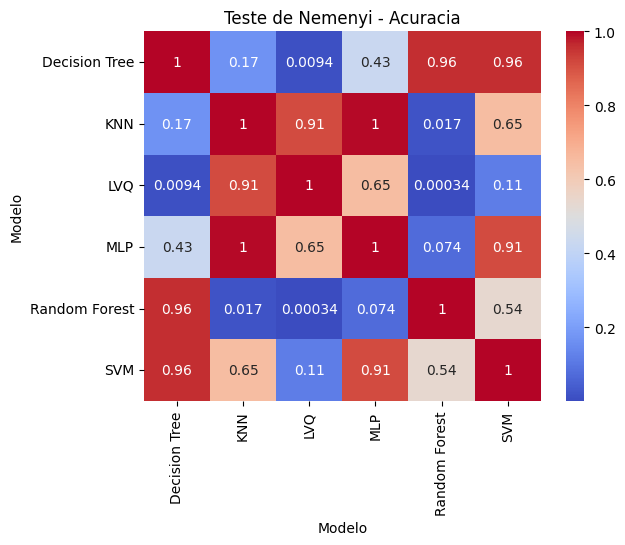


🔎 Teste para: Precisao
Friedman χ² = 24.5429, p = 0.0002
➡️ Diferença significativa. Teste de Nemenyi:


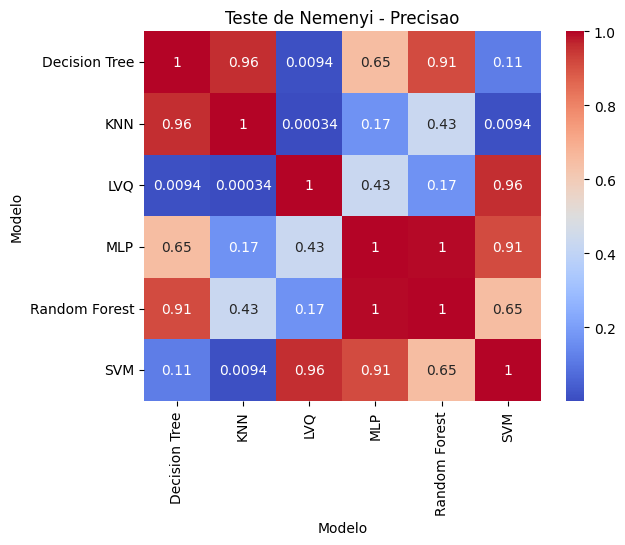


🔎 Teste para: Recall
Friedman χ² = 23.6286, p = 0.0003
➡️ Diferença significativa. Teste de Nemenyi:


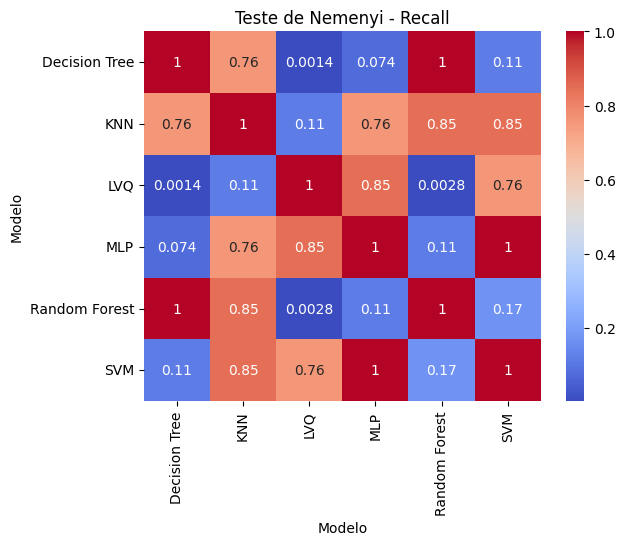


🔎 Teste para: F1
Friedman χ² = 24.3143, p = 0.0002
➡️ Diferença significativa. Teste de Nemenyi:


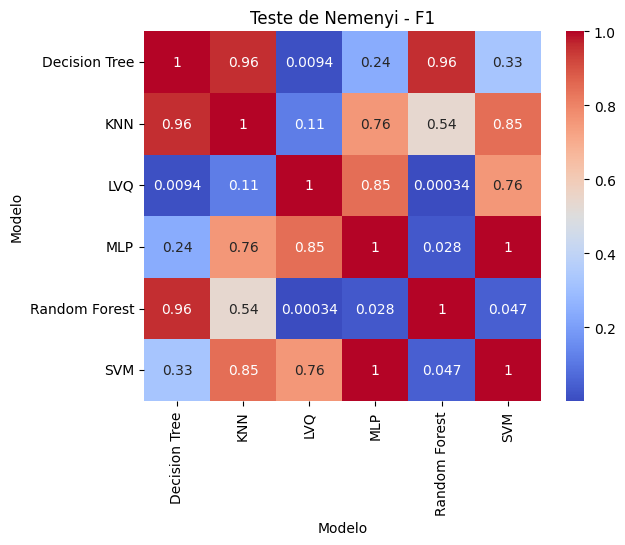


🔎 Teste para: AUC
Friedman χ² = 24.3143, p = 0.0002
➡️ Diferença significativa. Teste de Nemenyi:


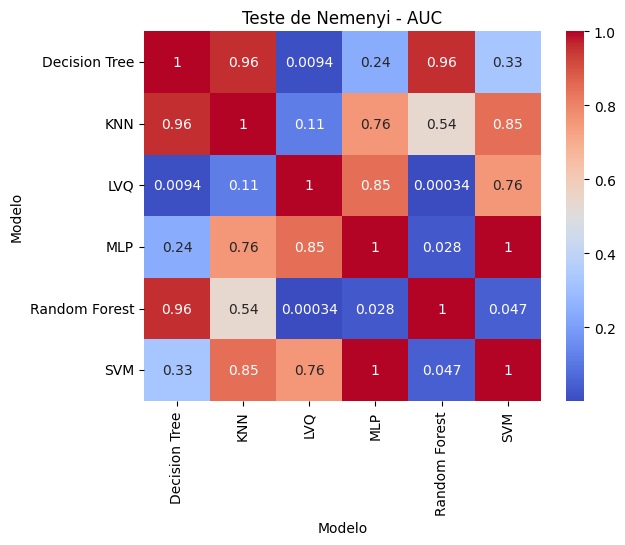

In [63]:
# Verificar diferenças significativas entre os modelos
for metrica in ["Acuracia", "Precisao", "Recall", "F1", "AUC"]:
    print(f"\n🔎 Teste para: {metrica}")
    
    df_m = df_folds.pivot(index='Fold', columns='Modelo', values=metrica)
    
    stat, p = friedmanchisquare(*[df_m[modelo] for modelo in df_m.columns])
    print(f"Friedman χ² = {stat:.4f}, p = {p:.4f}")
    
    if p < 0.05:
        print("➡️ Diferença significativa. Teste de Nemenyi:")
        nemenyi = sp.posthoc_nemenyi_friedman(df_m.values)
        nemenyi.index = df_m.columns
        nemenyi.columns = df_m.columns
        # print(nemenyi)

        sns.heatmap(nemenyi, annot=True, cmap="coolwarm")
        plt.title(f"Teste de Nemenyi - {metrica}")
        plt.show()
    else:
        print("✅ Nenhuma diferença significativa entre os modelos.")


#### 💾 Renomear colunas e salvar resultados por fold em CSV

In [ ]:
# Renomear colunas para português
df_folds = df_folds.rename(columns={
    "Modelo": "Classificador",
    "Fold": "Dobra",
    "Acuracia": "Acurácia",
    "Precisao": "Precisão",
    "Recall": "Revocação",  # ou mantenha "Recall" se preferir
    "F1": "F1-score",
    "AUC": "AUC-ROC"
})

# Visualizar os dados renomeados
display(df_folds)

# Salvar como CSV
df_folds.to_csv("resultadosPorFold.csv", index=False)


,Classificador,Dobra,Acurácia,Precisão,Revocação,F1-score,AUC-ROC
0,Decision Tree,1,0.817749,0.623705,0.613767,0.618696,0.748125
1,Decision Tree,2,0.813268,0.611252,0.616709,0.613968,0.746158
2,Decision Tree,3,0.808047,0.597307,0.622449,0.609619,0.744679
3,Decision Tree,4,0.812346,0.605875,0.631378,0.618364,0.750559
4,Decision Tree,5,0.813882,0.609471,0.632015,0.620539,0.751788
5,Random Forest,1,0.859051,0.749425,0.623327,0.680585,0.905282
6,Random Forest,2,0.862408,0.751874,0.639668,0.691247,0.908360
7,Random Forest,3,0.856880,0.742378,0.621173,0.676389,0.905915
8,Random Forest,4,0.856265,0.739757,0.621811,0.675676,0.904580
9,Random Forest,5,0.861794,0.754573,0.631378,0.687500,0.908098


## 4. Apresentação dos Resultados

### Fluxograma do Processo de Avaliação

![This is an alt text.](Fluxograma.jpeg)

### Recursos utilizados:

Lista de ferramentas e bibliotecas de código utilizadas na atividade.

Disponível no arquivo `requirements.txt`

#### Ambiente e Utilitários:

* `ipykernel`: Execução do Jupyter Notebook.
* `jupyter_client`: Cliente para comunicação com o servidor Jupyter.
* `jupyter_core`: Núcleo do Jupyter.
* `nest-asyncio`: Permite reutilizar o loop assíncrono dentro de notebooks.
* `prompt_toolkit`: Biblioteca para construção de interfaces interativas de linha de comando.
* `pyzmq`: Comunicação assíncrona entre processos.
* `psutil`: Monitoramento de processos e recursos do sistema.
* `platformdirs`: Localização de diretórios específicos da plataforma.
* `pywin32`: Extensões para Windows.
* `tornado`: Framework assíncrono usado pelo Jupyter Notebook.


#### Processamento de Dados e Análise Estatística:

* `numpy`: Manipulação de arrays numéricos.
* `pandas`: Manipulação e análise de dados tabulares.
* `scikit-learn`: Implementação dos algoritmos de classificação e validação cruzada.
* `scikit-posthocs`: Testes estatísticos pós-hoc (ex.: Nemenyi).
* `scipy`: Testes estatísticos (ex.: Friedman).
* `statsmodels`: Modelagem estatística.


#### Visualização de Dados:

* `matplotlib`: Criação de gráficos.
* `seaborn`: Visualização estatística.
* `colorama`: Exibição de cores no terminal.
* `fonttools`: Manipulação de fontes vetoriais.
* `pillow`: Manipulação de imagens.


#### Código e Depuração:

* `asttokens`: Análise da árvore de sintaxe abstrata (AST).
* `debugpy`: Debugger para Python.
* `executing`: Rastreamento da execução de código.
* `pure_eval`: Avaliação segura de expressões Python.
* `stack-data`: Exibição de pilha de execução.
* `traitlets`: Sistema de configuração e notificação usado pelo Jupyter.


#### Outras Dependências:

* `six`: Compatibilidade entre Python 2 e 3.
* `tzdata`: Suporte a fusos horários.
* `wcwidth`: Cálculo da largura de caracteres em terminais.
* `parso`: Análise sintática usada pelo Jedi.
* `jedi`: Sistema de autocompletar e análise de código.
* `patsy`: Criação de matrizes de design para modelos estatísticos.
* `packaging`: Manipulação de versões e dependências.

### Discussão dos Resultados (FALTA)

Conduzam uma discussão sobre os resultados obtidos. Foquem na interpretação das métricas e dos testes estatísticos, e como as características dos dados influenciam o desempenho dos classificadores.

## 5. Discussão Crítica e Conclusões (FALTA)

Baseando-se nos resultados, critiquem as limitações e vantagens de cada classificador. Discutam em quais cenários cada classificador seria mais apropriado, usando os resultados obtidos como base para suas argumentações.